In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC , LinearSVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
url= 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv'
medical = pd.read_csv (url )
medical = pd.read_csv (url )
medical.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
medical.shape

(1338, 7)

In [9]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


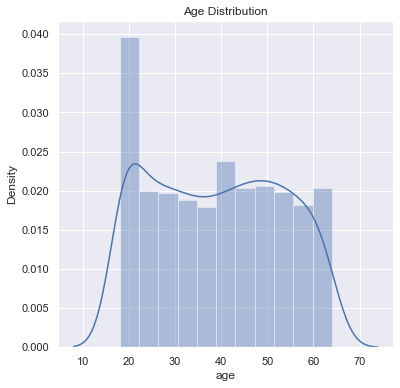

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical['age'])
plt.title('Age Distribution')
plt.show()

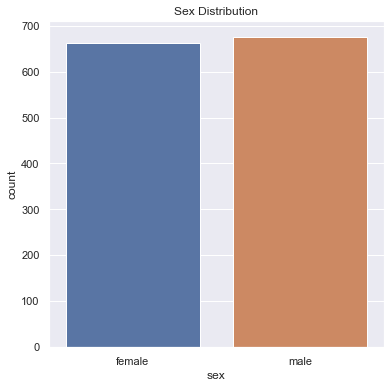

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical)
plt.title('Sex Distribution')
plt.show()

In [18]:
medical['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

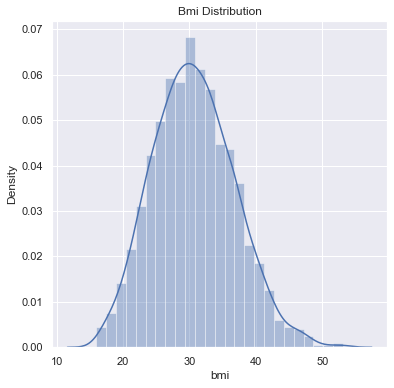

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(medical['bmi'])
plt.title('Bmi Distribution')
plt.show()

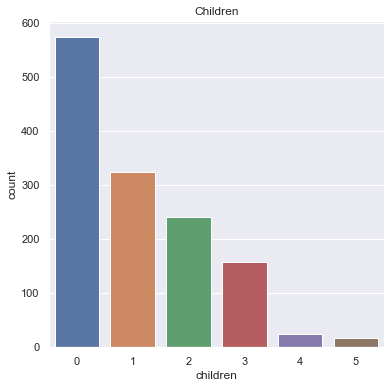

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=medical)
plt.title('Children')
plt.show()

In [21]:
medical['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

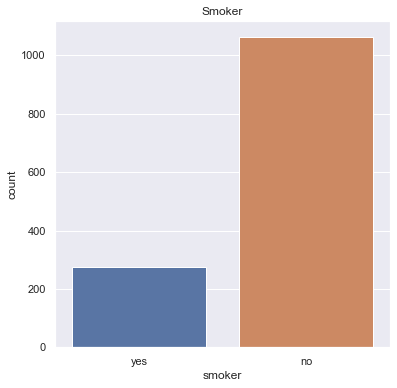

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=medical)
plt.title('Smoker')
plt.show()

In [23]:
medical['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

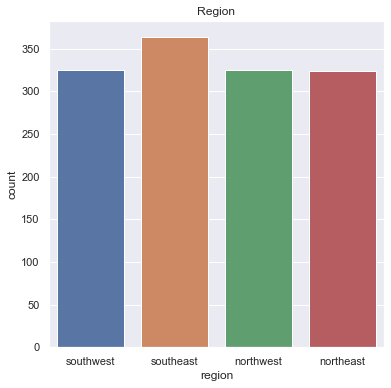

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=medical)
plt.title('Region')
plt.show()

In [26]:
medical['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

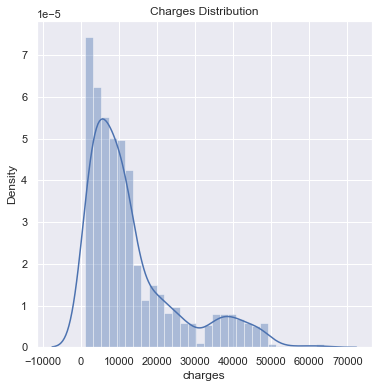

In [42]:
plt.figure(figsize=(6,6))
sns.distplot(medical['charges'])
plt.title('Charges Distribution')
plt.show()

In [43]:
medical.replace({'sex':{'male':0,'female':1}},inplace=True)


In [47]:
medical.replace({'smoker':{'yes':0,'no':1}},inplace=True)


In [48]:
medical.replace({'region':{'southeast':0,'southwest':1,'northeast':2 ,'northwest':3}},inplace=True)


In [49]:
X=medical.drop(columns='charges',axis=1)
Y=medical['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [50]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [54]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y,test_size=0.2, random_state=2)

In [56]:
print(X.shape, X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [62]:

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [63]:
prediction=model.predict(X_train)


In [64]:
r2_train=metrics.r2_score(Y_train,prediction)
print('R sq.. vale:',r2_train)


R sq.. vale: 0.751505643411174


In [67]:
prediction=model.predict(X_test)


In [68]:
 r2_test=metrics.r2_score(Y_test,prediction)
print('R sq.. vale:',r2_test)

R sq.. vale: 0.7447273869684077


In [69]:
input1=(31,1,25.74,0,1,0)
input1_np=np.asanyarray(input1)
input1_reshape=input1_np.reshape(1,-1)
prediction=model.predict(input1_reshape)
print(prediction)

[3760.0805765]


In [70]:
print('The insurance cost',prediction[0])


The insurance cost 3760.080576496046
